[]()**MSSQL Server Index** <a id='index'></a>

 |  |  |  |  |
 | ------- |-------  |-------  | -------   |
 |[**Data Types**](#sqltype) |[**T-SQL Select Processing**](#sqlseq)  | [**Convert Time**](#sqltime) |  |
 |[**Mathematical**](#sqlmath) |[**SQL DDL Command Definition**](#sqlDDL)  |[**Convert DateTime**](#sqldt)  |  |
 | [**Aggregate Data**](#sqlagg) |[**Database, Tables, Data, Views, Stored Procedures**](#sqlDB)  | [**Format Date**](#sqldtformat) |  |
 |[**String Functions**](#sqlstring)  |[**Date Functions**](#sqldateFunc)  |[**Format Number**](#sqlintformat)  |  |
 | [**Comparison Operators**](#sqlcompare) |[**Convert Date**](#sqldate)  |[**TSQL Window Function**](#sqlwindow)  |  |


In [ ]:
SET NOCOUNT ON; -- Reduce output messages

[]()**Data Types** - [**Back to Index**](#index)  
[https://docs.microsoft.com/en-us/sql/t-sql/data-types/data-types-transact-sql?view=sql-server-ver15](https://docs.microsoft.com/en-us/sql/t-sql/data-types/data-types-transact-sql?view=sql-server-ver15)

* * *

**Exact numbers:** bigint, numeric, bit, smallint, decimal, smallmoney, int, tinyint, money  
**Approximate numbers:** float,real  
**Date and time:** date, datetime2,datetimeoffset,smalldatetime,datetime,time  
**Character strings:** **char(Max / size)** will contain spaces to the exact size, **text**, **varchar(Max / size)** no space padding  
**Unicode strings:** **nchar(Max / size)** will contain spaces to the exact size, **ntext**, **nvarchar(Max / size)** no space padding  
**Binary strings:** binary,varbinary,image  
**Other data types:** cursor,rowversion,hierarchyid,uniqueidentifier  
**sql\_variant:** xml, Spatial Geometry Types, Spatial Geography Types, table

In [ ]:
-- SQL Data Types
select --Exact numbers
Convert(bigint, -9223372036854775808) as MinBigInt,
Convert(bigint, 9223372036854775807) as MaxBigInt,
Convert(int, -2147483648) as MinInt,
Convert(int, 2147483647) as MaxInt,
Convert(smallint, -32768) as MinSmallInt,
Convert(smallint, 32767) as MaxSmallInt,
Convert(TinyInt, 0) as MinTinyInt,
Convert(TinyInt, 255) as MaxTinyInt,
Convert(bit,Null) as NullBit,
Convert(bit,0) as MinBit,
Convert(bit,1) as MaxBit,
Convert(money, -922337203685477.5808) as MinMoney,
Convert(money, 922337203685477.5807) as MaxMoney,
--Approximate numbers
Convert(float, '-1.79E+308') as MinFloat,
Convert(float, '1.79E+308') as  MaxFloat,
Convert(real, '-3.40E+38') as  MinReal,
Convert(real, '3.40E+38') as MaxReal;
Select -- Date&Time
convert(date,SYSDATETIME()) as [Date],
convert(datetime2,SYSDATETIME()) as [Datetime2],
convert(datetime2(2),SYSDATETIME()) as [Datetime2Frac], --  (fractional seconds precision up to 7)
convert(datetimeoffset(2), '12-31-2050 12:00:00 +01:00') as [Datetimeoffset],  -- Time zone range -14:00 through +14:00 = 24hours
convert(smalldatetime,'1900-01-01') as MinSmalldatetime, 
convert(smalldatetime,'2079-06-06') as MaxSmalldatetime,
convert(time,SYSDATETIME()) as [Time],
convert(time(2),SYSDATETIME()) as [TimeFrac]; --  (fractional seconds precision up to 7)
Select -- Strings
Convert(char(30), 'Hello') as [Char], 
Convert(nchar(30), N'Wörld') as [NChar],
Convert(varchar(30), 'Hello') as [varchar],
Convert(nvarchar(30), N'Wörld') as [Nvarchar]
-- Geography
SELECT (geography::STGeomFromText('LINESTRING(-122.360 47.656, -122.343 47.656 )', 4326));  
SELECT (geography::STGeomFromText('POLYGON((-122.358 47.653 , -122.348 47.649, -122.348 47.658, -122.358 47.658, -122.358 47.653))', 4326));  

**Mathematical** - <a id='sqlmath'></a> [**Back to Index**](#index)  <br>
https://docs.microsoft.com/en-us/sql/t-sql/functions/mathematical-functions-transact-sql?view=sql-server-ver15<br>

| Command | Description                                                                              | Command | Description                                                  |
| ------- | ---------------------------------------------------------------------------------------- | ------- | ------------------------------------------------------------ |
| **ABS**     | Absolute (positive) value of the specified numeric expression.                           | **LOG**     | Returns the natural logarithm of the specified float         |
| **ACOS**    | Arccosine returns the angle, in radians, whose cosine is the specified float expression. | **LOG10**   | Returns the base-10 logarithm of the specified float         |
| **ASIN**    | Arcsine returns the angle, in radians, whose sine is the specified float expression.     | **PI**      | Returns the constant value of PI.                            |
| **ATAN**    | Arctangent angle, in radians, whose tangent is a specified float expression.             | **POWER**   | Float input to the "power of" input                          |
| **ATN2**    | Radians, between the positive x-axis and the ray from the origin to the point (y, x)     | **RADIANS** | Radians when a numeric expression, in degrees, is entered    |
| **CEILING** | Take a fraction to the next whole number                                                 | **RAND**    | Pseudo-random float value from 0 through 1 with a seed value |
| **FLOOR**   | Take a fraction to the lower whole number                                                | **ROUND**   | Numeric value, rounded to the specified length or precision  |
| **COS**     | Trigonometric cosine of the specified angle - measured in radians                        | **SIGN**    | Returns the positive (+1), zero (0), or negative (-1) sign   |
| **COT**     | Trigonometric cotangent of the specified angle - in radians                              | **SIN**     | Trigonometric sine of the specified angle, in radians        |
| **DEGREES** | Convert angle, in degrees, for an angle specified in radians                             | **SQRT**    | Returns the square root of the specified float value         |
| **EXP**     | Exponential value of the specified float expression                                      | **SQUARE**  | Returns the square of the specified float value.             |
| **+ - * / %**   | Basic Math operators, +Adding, -Subtract, *Multiply, /Division, %Modulus              | **TAN**    | Returns the tangent of the input expression                  |

In [ ]:
--Mathematical Functions
SELECT (2+2) as [Adding], (4-2) as [Subtract], (10*10) as [Multiply], (10/2) as [Division], (38%5) as [Modulus]
SELECT ABS(-1.0) AS NegNoOne, ABS(-2.0) AS NegNoTwo, ABS(1.0) PosNo; 
SELECT ACOS(1.0) AS PieStart, ACOS(-0.0) AS PieHalf, ACOS(-1.0) AS PieFull; 
SELECT ASIN(0.1472738) Angle, ASIN(-1.00) AS MinAngle,ASIN(1.00) AS MaxAngle; 
SELECT ATAN(45.87) AS atanCalc1, ATAN(-181.01) AS atanCalc2,  ATAN(0) AS atanCalc3,  ATAN(0.1472738) AS atanCalc4,  ATAN(197.1099392) AS atanCalc5;  
SELECT 'ATN2(x,y) angle is: ' + CONVERT(VARCHAR, ATN2(35.175643, 129.44)) as [ATN2(x,y)];  
SELECT CEILING(123.01) as [123.01], CEILING(-123.01) as [-123.01], CEILING($123.01) as [$123.01];
SELECT FLOOR(123.99) as [123.99], FLOOR(-123.99) as [-123.99], FLOOR($123.99) as [$123.99];
SELECT COS(14.76) AS cosCalc1, COS(-0.1472738) AS cosCalc2; 
SELECT 'COT of the angle is: ' + CONVERT(VARCHAR, COT(124.1332)) as [COT];  
SELECT 'Degrees PI/2 radians is: ' +  CONVERT(VARCHAR, DEGREES((PI()/2))) as [Pi/2]; 
SELECT EXP(10) as [Exp(10)];
SELECT 'LOG is: ' + CONVERT(VARCHAR, LOG(10)) as [Log(10)];  
SELECT 'LOG10 is: ' + CONVERT(VARCHAR,LOG10(145.175643)) as [Log10(145.175643)];  
SELECT PI() as [Pi];
SELECT POWER(2, 3) AS [2^3], POWER(2.5, 3) AS [2.5^3]; 
SELECT RADIANS(-181.01) AS [-181.01], RADIANS(-45.01) AS [-45.01];
SELECT RAND() AS [RAND], RAND(0.5) AS [RAND(0.5)], RAND(100) AS [RAND(100)];
SELECT ROUND(123.4545, 2) AS [Round1], ROUND(123.45, -2) AS [Round2],ROUND(150.75, 0) AS [Round3],ROUND(150.75, 0, 1) AS [Round4]; 
SELECT SIGN(-125) AS [-125], SIGN(0) AS [0], SIGN(564) AS [564];   
SELECT 'SIN angle is: ' + CONVERT(VARCHAR, SIN(45.175643)) AS [SIN];  
SELECT SQRT(1.00) [SQRT 1.00], SQRT(10.00) as [SQRT 10.00];
SELECT SQUARE(125.22) AS [Cylinder], SQUARE(23.98) AS [Cube];
SELECT TAN(.45) as [TAN(.45)];    

**Aggregate Data**   - <a id='sqlagg'></a> [**Back to Index**](#index)<br>
[https://docs.microsoft.com/en-us/sql/t-sql/functions/aggregate-functions-transact-sql?view=sql-server-ver15](https://docs.microsoft.com/en-us/sql/t-sql/functions/aggregate-functions-transact-sql?view=sql-server-ver15)<br>

| Command                 | Description                                                                   | Command     | Description                                                   |
| ----------------------- | ----------------------------------------------------------------------------- | ----------- | ------------------------------------------------------------- |
| **APPROX\_COUNT\_DISTINCT** | Approximate number of unique non-null values in a group                       | **MAX**         | Returns the maximum value                                     |
| **AVG**                     | Average of the values in a group. It ignores null values                      | **MIN**         | Returns the minimum value                                     |
| **CHECKSUM\_AGG**           | Returns the checksum of the values in a group                                 | **STDEV**       | Returns the statistical standard deviation                    |
| **COUNT**                   | Number of items found in a group                                              | **STDEVP**      | Returns the statistical standard deviation for the population |
| **COUNT\_BIG**              | Number of items found in a group in BigInt format                             | **STRING\_AGG** | Concatenates the values of string expressions                 |
| **GROUPING**                | Column expression in a GROUP BY list is aggregated or not. GROUPING returns 1 | **SUM**         | Returns the sum of all the values                             |
| **GROUPING\_ID**            | Computes the level of grouping                                                | **VAR**         | Returns the statistical variance of all values                |
|                         |                                                                               | **VARP**        | Returns the statistical variance for the population           |


In [ ]:
-- Aggregate Data functions... 
-- ##### Adding Test Data
IF OBJECT_ID('tempdb..#Order') IS NOT NULL DROP TABLE #Order; 
Create Table #Order ([RecId] int not null Primary Key IDENTITY, [OrderNo] int, [OrdDate] date, Part varchar(16), [Qty] int, [Price] money, [Total] money, [BigOne] bigint);
Insert into #Order([OrderNo], [OrdDate], [Part], [Qty], [Price], [Total], [BigOne]) Values (1000,'1/1/2000','Bike', 10,10,100.00, 214748365);
Insert into #Order([OrderNo], [OrdDate], [Part], [Qty], [Price], [Total], [BigOne]) Values (1001,'8/4/2000','Bike', 7,8.02,56.16, 214748365);
Insert into #Order([OrderNo], [OrdDate], [Part], [Qty], [Price], [Total], [BigOne]) Values (1002,'2/28/2001','Bike', 5,4,20.00, 214748365);
Insert into #Order([OrderNo], [OrdDate], [Part], [Qty], [Price], [Total], [BigOne]) Values (1003,'10/31/2000','Car',15,11.01,165.15, 214748365);
-- ##### End Test Data

-- Approximate count of unique non-null values in a group.
SELECT APPROX_COUNT_DISTINCT([Part]) as Approx_Parts_Count From #Order;

-- Grouping
Select [Part], Sum([Total]) as [Sum_Total] from #Order Group By [Part]; -- Sum Rows based on Group on Part. 
Select IsNull([Part],'Grand Total:') as [Part], Grouping([Part]) as 'PartGroupRollup', Sum([Total]) as [Sum_Total] from #Order Group By [Part] with rollup; -- Grouping Rolloup: 0 is Group by line total value, 1 is the grand total value for all rows. 

-- Averaging value by Group By, Partition By, Order By
SELECT  Avg([Total]) as [AggValue], DATEPART(yy,[OrdDate]) as [Year], 'Average Group By - Average' as [Type] From #Order Group by DATEPART(yy,[OrdDate]) Union ALL  
SELECT  CONVERT(VARCHAR(20),AVG([Total]) OVER (PARTITION BY DATEPART(yy,[OrdDate])),1) AS [MovingAvg], DATEPART(yy,[OrdDate]), 'Partition By - Moving Avg' as [Type] From #Order UNION  
SELECT  CONVERT(VARCHAR(20),AVG([Total]) OVER (Order By DATEPART(yy,[OrdDate])),1) AS [MovingAvg], DATEPART(yy,[OrdDate]), 'Order By - Moving Avg' as [Type] From #Order 
Order by [Type], [Year]; 

-- Counting
Select Count(*) as [Count_IntRows] from #Order -- Count rows less than or equal to 2,147,483,64
Select Count_Big(*) as [Count_BigIntRows] From #Order; -- Count rows greater than 2,147,483,64. 
Select [Part], Count(*) as [Count_Parts_Ordered] from #Order Group By [Part]; -- Count Rows based on Group

-- Min & Max Values
Select Min([Total]) as MinOrderTotal from #Order;
Select Max([Total]) as MaxOrderTotal from #Order;

-- Sum, can add up Tiny, SmallInt, Int, BigInt, Decimal, Money, Numeric, float, real numbers.
Select Sum([Total]) as SalesGrandTotal, Sum(BigOne) SumLargeNo from #Order;
Select [Part], Sum([Total]) as SalesPartTotal, Sum(BigOne) SumLargeNo from #Order Group by [Part];

-- String Agg, Concatenates the values of string expressions and places separator values between them. The separator isn't added at the end of string.
SELECT STRING_AGG(CONVERT(NVARCHAR(max), ISNULL([Part],'N/A')), ',') AS csv FROM #Order;

-- T-SQL Statistics 
-- Statistical standard deviation of all values in the specified expression.
SELECT STDEV([Total]) AS STDEV_Values FROM #Order;
SELECT DATEPART(yy,[OrdDate]) as [Year], DATEPART(QQ,[OrdDate]) AS Quarter, [Total] AS SalesTotal, STDEV([Total]) OVER (ORDER BY  DATEPART(yy,[OrdDate]),DATEPART(QQ,[OrdDate])) AS StdDeviation FROM #Order;
-- Statistical standard deviation for the population for all values in the specified expression
SELECT STDEVP([Total]) AS STDEVP_Values FROM #Order;
SELECT DATEPART(yy,[OrdDate]) as [Year], DATEPART(QQ,[OrdDate]) AS Quarter, [Total] AS SalesTotal, STDEVP([Total]) OVER (ORDER BY  DATEPART(yy,[OrdDate]),DATEPART(QQ,[OrdDate])) AS StdDeviation FROM #Order;
-- Statistical variance of all values
SELECT Var([Total]) AS STDEV_Values FROM #Order;
SELECT DATEPART(yy,[OrdDate]) as [Year], DATEPART(QQ,[OrdDate]) AS Quarter, [Total] AS SalesTotal, VAR([Total]) OVER (ORDER BY  DATEPART(yy,[OrdDate]),DATEPART(QQ,[OrdDate])) AS Variance FROM #Order
-- Statistical variance of population for all values.
SELECT VarP([Total]) AS STDEV_Values FROM #Order;
SELECT DATEPART(yy,[OrdDate]) as [Year], DATEPART(QQ,[OrdDate]) AS Quarter, [Total] AS SalesTotal, VARP([Total]) OVER (ORDER BY  DATEPART(yy,[OrdDate]),DATEPART(QQ,[OrdDate])) AS Variance FROM #Order

-- Clean up
 DROP TABLE #Order;

**String Functions** -  [**Back to Index**](#index) <a id='sqlstring'></a><br>
https://docs.microsoft.com/en-us/sql/t-sql/functions/string-functions-transact-sql?view=sql-server-ver15

| Command    | Description                                                                        | Command   | Description                                                                        | Command        | Description                                                                                      |
| ---------- | ---------------------------------------------------------------------------------- | --------- | ---------------------------------------------------------------------------------- | -------------- | ------------------------------------------------------------------------------------------------ |
| **ASCII**      | Returns the ASCII code value                                                       | **LTRIM**     | Trims any spaces from the left side of a string                                    | **SPACE**          | Add number of space in a string.                                                                 |
| **CHAR**       | Returns the character by input ASCII code value                                    | **NCHAR**     | Returns the Unicode character with the specified integer code                      | **STR**            | Data converted from numeric data right-justified, with a specified length and decimal precision. |
| **CHARINDEX**  | Returns the starting position of string search match.                              | **PATINDEX**  | Returns the starting position of the first occurrence of a pattern in a specified  | **STRING\_AGG**    | Concatenates the values of string expressions                                                    |
| **CONCAT**     | Join two or more strings together including null values.                           | **QUOTENAME** | Returns a Unicode string with the delimiters added to make the input               | **STRING\_ESCAPE** | Escapes special characters in texts and returns text with escaped characters                     |
| **CONCAT\_WS** | Join two or more strings together including null values  with delimiter specified. | **REPLACE**   | Replaces all occurrences of a specified string value with another string value     | **STRING\_SPLIT**  | A table-valued function that splits a string into rows of substrings                             |
| **DIFFERENCE** | Int value measuring the difference between the SOUNDEX() of different character    | **REPLICATE** | Repeats a string value a specified number of times.                                | **STUFF**          | The STUFF function inserts a string into another string.                                         |
| **FORMAT**     | Format Numbers and Date to specified format                                        | **REVERSE**   | Returns the reverse order of a string value                                        | **SUBSTRING**      | Returns part of a character, binary, text, or image expression                                   |
| **LEFT**       | Returns First part of string specified by number of character.                     | **RIGHT**     | Returns Last part of string specified by number of characters.                     | **TRANSLATE**      | Like Replace however can replace multiple replacements                                           |
| **LEN**        | Return the length/size of a string.                                                | **RTRIM**     | Trims any spaces from the right side of a string                                   | **TRIM**           | Trims spaces from the left and right side of a string                                            |
| **LOWER**      | Return the entire string into lower case letters                                   | **SOUNDEX**   | Returns a four-character (SOUNDEX) code to evaluate the similarity of two strings. | **UNICODE**        | Returns the integer value, as defined by the Unicode standard                                    |
|            |                                                                                    |           |                                                                                    | **UPPER**          | Returns the string in all upper case letters                                                     |

In [ ]:
-- String Functions
SELECT ASCII('A') AS A, ASCII('B') AS B, ASCII('a') AS a, ASCII('b') AS b, ASCII(1) AS [1], ASCII(2) AS [2];  
SELECT CHAR(65) AS [65], CHAR(66) AS [66], CHAR(97) AS [97], CHAR(98) AS [98],  CHAR(49) AS [49], CHAR(50) AS [50];  
SELECT CHARINDEX ( 'Test',  'This is a Test') AS [Test_CHARINDEX_StartsAtPos];
SELECT CONCAT( 'FirstName', ' ', NULL,' ','LastName' ) AS [FML_FirstMiddelLast_CONCAT];
SELECT 'FirstName' +' ' + NULL +' '+ 'LastName' [FML_UsingAdding];
SELECT 'FirstName' +' ' + ISNULL(NULL,'') +' '+ 'LastName' [FML_UsingAddingCorrected_ISNull];
SELECT CONCAT_WS(',','1 Microsoft Way', NULL, NULL, 'Redmond', 'WA', 98052) AS [Address_CONCAT_WS];
SELECT SOUNDEX('Green') AS [Green], SOUNDEX('Greene') AS [Greene], DIFFERENCE('Green','Greene') AS [DifferenceScore]; --No Difference 
SELECT SOUNDEX('Blotchet-Halls') AS [Blotchet-Halls], SOUNDEX('Greene') AS [Greene], DIFFERENCE('Blotchet-Halls', 'Greene') AS [DifferenceScore]; -- Not the same. 
SELECT FORMAT(1234567,'###-####') as [Format];
SELECT LEFT('abcdefg',3) as [Left];
SELECT LEN( 'Test of 22 characters ') AS [LEN] , DATALENGTH( 'Test of 22 characters ') AS [DATALENGTH];  
SELECT LOWER('HELLO WORLD') as [Lowercase];
SELECT LTRIM('   HELLO WORLD   ') as [LeftTrim];
SELECT NCHAR(0xD84C) + NCHAR(0xDD7F) AS [NCHAR];
SELECT PATINDEX('%ter%', 'interesting data') AS  [Position];  
SELECT PATINDEX('%[^ 0-9A-Za-z]%', 'Please ensure the door is locked!') AS [FindTheNonAlpha];
SELECT QUOTENAME('Hello World', '()') AS [AddQuoteChar];
SELECT REPLACE('I am Superman', 'man', 'woman' ) AS [Replace];  
SELECT REPLICATE('B', 4) + 'AD' AS [ReplicateB]
SELECT REVERSE('abcdefghijklmnopqrstuvwxyz') AS [Reverse],REVERSE('zyxwvutsrqponmlkjihgfedcba') as [UndoReverse];
SELECT RIGHT('abcdefg',3) as [Right];
SELECT RTRIM('   HELLO WORLD   ') as [RTrim];
SELECT SOUNDEX ('Smith') AS [Smith], SOUNDEX ('Smythe') AS [Smythe];  
SELECT 'FirstName' + SPACE(10) +  'LastName' AS [AddSpaces];
SELECT STR(123.45, 8, 4) as [StrRightJust];
SELECT STRING_ESCAPE('\   /  \\    "     ', 'json') AS escapedText;
SELECT value FROM STRING_SPLIT('clothing,road,,touring,bike', ',') WHERE RTRIM(value) <> '';
SELECT STUFF('ABCDEFG',3,3,'XXX') AS [StuffInjectText];
SELECT SUBSTRING('abcdef', 2, 3) AS [SubString];  
SELECT TRANSLATE('abcdef','abc','bcd') AS Translated, '  ' as [vs.],  REPLACE(REPLACE(REPLACE('abcdef','a','b'),'b','c'),'c','d') AS Replaced;
SELECT TRIM('   HELLO WORLD   ') as [Trim];
SELECT UNICODE(N'Åkergatan 24') as [UCharInt], NCHAR(UNICODE(N'Åkergatan 24')) [UChar]; 
SELECT UPPER('hello world') as [Uppercase];

**Comparison Operators** -  [**Back to Index**](#index) <a id='sqlcompare'></a><br>
https://docs.microsoft.com/en-us/sql/t-sql/language-elements/comparison-operators-transact-sql?view=sql-server-ver15<br>

| Operator                       | Meaning                  | Operator              | Meaning                             |
| ------------------------------ | ------------------------ | --------------------- | ----------------------------------- |
| **\=**                   | Equal to                 | **<>**      | Not equal to                        |
| **\>**               | Greater than             | **!=**    | Not equal to (not ISO standard)     |
| **<**                | Less than                | **!<**    | Not less than (not ISO standard)    |
| **\>=**  | Greater than or equal to | **!>** | Not greater than (not ISO standard) |
| **<=**      | Less than or equal to    |                       |                                     |

**SQL Server Sequence of Logical Processing on Select**   -  [**Back to Index**](#index) <a id='sqlseq'></a><br>
https://docs.microsoft.com/en-US/sql/t-sql/queries/select-transact-sql?view=sql-server-ver15<br>
--------
***Note:** The actual physical execution of the statement is determined by the query processor and the order may vary from this list.<br>
While normally true, uncommon cases where the sequence may differ.

| Seq | Command | Seq | Command |
| --- | --- | --- | --- |
| 1. | **FROM** | 7. | **HAVING** |
| 2. | **ON** | 8. | **SELECT** |
| 3. | **JOIN** | 9. | **DISTINCT** |
| 4. | **WHERE** | 10. | **UNION** |
| 5. | **GROUP BY** | 11. | **ORDER BY** |
| 6. | **WITH CUBE or WITH ROLLUP** | 12. | **TOP, LIMIT, OFFSET** |

**SQL DDL Command Definition** - [**Back to Index**](#index)[]()  <a id='sqlDDL'></a><br>
* * *
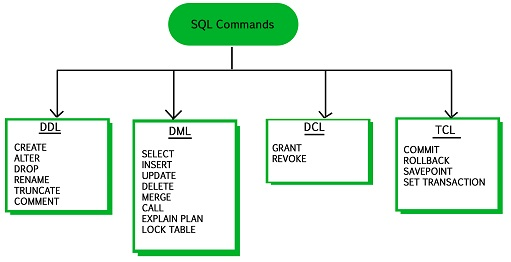  
**DDL** - Data Definition Language for defining Data structure.   Create/Drop Table, Add Columns.  
**DML** - Data Manipulation Language for Insert, Delete, Update, Select  
**DCL** - Data Control Language -  Grant, Revoke, Permissions, Roles  
**TCL** - Transactional Control Language -  Commit, Rollback, savepoint  
**DQL** - Data Query Language - Select \* from     \*Optional term some people may use

**Creating Simple: Database, Tables, Data, Views, Stored Procedures (with Simple T-SQL Examples)** -  [**Back to Index**](#index) <a id='sqlDB'></a><br>

--------

[https://www.quackit.com/sql\_server/sql\_server\_2017/tutorial/create\_a\_database\_in\_sql\_server\_2017.cfm](https://www.quackit.com/sql_server/sql_server_2017/tutorial/create_a_database_in_sql_server_2017.cfm)<br>
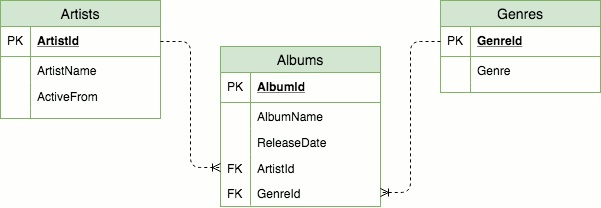

In [ ]:
-- Creating Database, Tables, Views, and Stored Procedures  (Requirements must be a database administrator)
DROP DATABASE IF EXISTS [Music];
CREATE DATABASE [Music]; -- Using SQL Server Defauls file/log location and size.
GO -- End of Batch Command 
-- Custom Database File/Log
-- CREATE DATABASE Music  
-- ON ( NAME = Music_dat,  FILENAME = 'D:\mssql\data\musicdat.mdf', SIZE = 10, MAXSIZE = UNLIMITED, FILEGROWTH = 5 )  
-- LOG ON ( NAME = Music_log,  FILENAME = 'D:\mssql\data\musiclog.ldf', SIZE = 5000KB, MAXSIZE = 25, FILEGROWTH = 5% );
USE [Music]; -- Switch to new Music Database

CREATE TABLE [Artists] (
  [ArtistId] int IDENTITY(1,1) NOT NULL PRIMARY KEY,   -- Auto Increment number starting with 1, and increasing id by 1, primary key insure unique identifier.
  [ArtistName] nvarchar(255) NOT NULL,
  [ActiveFrom] date
);
GO -- End of Batch Command 

CREATE TABLE [Genres] (
  [GenreId] int IDENTITY(1,1) NOT NULL PRIMARY KEY,  -- Auto Increment number, primary key insure unique identifier.
  [Genre] nvarchar(50) NOT NULL
);

CREATE TABLE [Albums] (
  [AlbumId] int IDENTITY(1,1) NOT NULL PRIMARY KEY, -- Auto Increment number, primary key insure unique identifier.
  [AlbumName] nvarchar(255) NOT NULL,
  [ReleaseDate] date NOT NULL,
  [ArtistId] int NOT NULL,
  [GenreId] int NOT NULL

  CONSTRAINT FK_Albums_Artists FOREIGN KEY ([ArtistId])  -- Create a relationship between Artists and Albumns, an Artists can create multiple Albumns
    REFERENCES [dbo].[Artists] ([ArtistId])     
    ON DELETE NO ACTION  -- ON DELETE CASCADE  
    ON UPDATE NO ACTION   -- ON UPDATE CASADE   
);
GO

CREATE VIEW [RockAlbums] AS  -- Storing a Query as a view for reuse and faster performance. 
SELECT [AlbumName], [ArtistName], [ReleaseDate]
FROM [Albums]
	INNER JOIN [Artists]
	ON [Albums].[ArtistId] = [Artists].[ArtistId] 
    INNER JOIN [Genres]
    ON [Albums].[GenreId] = [Genres].[GenreId]
WHERE [Genres].[Genre] = 'Rock';
GO

CREATE PROCEDURE [spAlbumsFromArtist] @ArtistName varchar(255) AS   -- Stored Procedures can contain custom business logic, added security, and parameters input & outputs. 
	SELECT  al.[AlbumName], al.[ReleaseDate], g.[Genre]
	FROM [Albums] AS al
		INNER JOIN [Artists] AS ar
		ON al.[ArtistId] = ar.[ArtistId]
		INNER JOIN [Genres] AS g
		ON g.[GenreId] = al.[GenreId] 
	WHERE ar.[ArtistName] = @ArtistName;
GO

In [ ]:
-- Inserting Test Data
Use [Music];
-- Prevent sql notebook user from inserting twice...
TRUNCATE TABLE [Genres]; -- TRUNCATE TABLE locks the table and removes all data from it, faster than delete command, It also resets the table auto-increment value back to the starting value
ALTER TABLE [Albums] NOCHECK CONSTRAINT FK_Albums_Artists; -- Disable the FK constraints
TRUNCATE TABLE [Albums];
DELETE  FROM [Artists]; -- FK can't be truncated
DBCC CHECKIDENT ('[Artists]', RESEED, 1); -- Reseeding the auto-increment value

-- Inserting Test Data
INSERT INTO [Artists] ([ArtistName], [ActiveFrom])
VALUES ('Iron Maiden','1975-12-25'),('AC/DC','1973-01-11'), ('Allan Holdsworth','1969-01-01'),('Buddy Rich','1919-01-01'),('Devin Townsend','1993-01-01'),('Jim Reeves','1948-01-01'),('Tom Jones','1963-01-01'),('Maroon 5','1994-01-01'),
  ('The Script','2001-01-01'),('Lit','1988-06-26'),('Black Sabbath','1968-01-01'),('Michael Learns to Rock','1988-03-15'),('Carabao','1981-01-01'),('Karnivool','1997-01-01'),('Birds of Tokyo','2004-01-01'), ('Bodyjar','1990-01-01'), ('Trent Reznor','1965-05-17');

INSERT INTO [Genres] ([Genre]) 
VALUES ('Rock'), ('Jazz'), ('Country'),('Pop'),('Blues'),('Hip Hop'),('Rap'),('Punk'),('Industrial');

BEGIN TRANSACTION ;  -- Using Transactions Insert or (BEGIN TRAN)
INSERT INTO [Albums] ([AlbumName], [ReleaseDate], [ArtistId], [GenreId])
VALUES ('Powerslave', '1984-09-03', 1, 1), ('Powerage', '1978-05-05', 2, 1),  ('Singing Down the Lane', '1956-01-01', 6, 3), ('Ziltoid the Omniscient', '2007-05-21', 5, 1), ('Casualties of Cool', '2014-05-14', 5, 1),
  ('Epicloud', '2012-09-18', 5, 1), ('Somewhere in Time', '1986-09-29', 1, 1),	('Piece of Mind', '1983-05-16', 1, 1),	('Killers', '1981-02-02', 1, 1),('No Prayer for the Dying', '1990-10-01', 1, 1),('No Sound Without Silence', '2014-09-12', 9, 4),	
  ('Big Swing Face', '1967-06-01', 4, 2),('Blue Night', '2000-11-01', 12, 4),('Eternity', '2008-10-27', 12, 4),	('Scandinavia', '2012-06-11', 12, 4),	('Long Lost Suitcase', '2015-10-09', 7, 4),	('Praise and Blame', '2010-06-26', 7, 4),	
  ('Along Came Jones', '1965-05-21', 7, 4),	('All Night Wrong', '2002-05-05', 3, 2),('The Sixteen Men of Tain', '2000-03-20', 3, 2),('1Pretty Hate Machine', '1991-01-01', 18, 9);
COMMIT TRANSACTION;  

DECLARE @TransactionName VARCHAR(4) = 'Undo'; -- Declare a transaction name
BEGIN TRANSACTION @TransactionName;  -- Using Transactions with name
INSERT INTO [Genres] ([Genre]) VALUES ('Pokemon');
ROLLBACK TRANSACTION @TransactionName;  -- This never happened, you can't capture them all!

ALTER TABLE [Albums]  CHECK CONSTRAINT FK_Albums_Artists;-- Re-enable FK constraints

In [ ]:
-- Selecting & Query Data, Views and Stored Procedures
Use [Music];

SELECT * FROM Artists;  -- Select "*" aka ALL is not recommended in production or for query performance. 
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums];  -- Recommended Select statement after knowing the column names that you need to use.

--'Modify Select output '
SELECT [AlbumName], YEAR([ReleaseDate]) AS [Year] FROM [Albums]; -- Convert Date into Year
SELECT [AlbumName] AS [RecordName] FROM [Albums]; -- "AS" is optional when Renaming columns

--'Adding Criteria using Where'
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [ArtistId] = 1; 
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [ArtistId] in (1,3,7);   -- Where in List
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [ArtistId] not in (1,3,7);  -- Where not in List
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [ReleaseDate] < '1980-01-01';
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [ReleaseDate] between '1950-01-01' and '1980-01-01';  -- Date Range using between
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [ReleaseDate] >= '1950-01-01' and '1980-01-01' >= [ReleaseDate];  -- Date Range using operators
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [AlbumName] = 'Big Swing Face';
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE Upper([AlbumName]) like '%THE%';
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE Upper([AlbumName]) not like '%THE%';
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [AlbumName] LIKE 'P[^p]%';
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [AlbumName] LIKE '[0-9]%';
SELECT [AlbumId], [AlbumName], [ArtistId] FROM [Albums] WHERE [AlbumName] LIKE '[A-z]%';
--'Selecting a View'
SELECT  [AlbumName], [ArtistName], [ReleaseDate] FROM RockAlbums WHERE ReleaseDate > '1985-01-01';
--'Counting '
SELECT [AlbumName], Count(*) as [NumberOfAlbums] FROM [Albums] GROUP BY [AlbumName];
SELECT [AlbumName] FROM [Albums] GROUP BY [AlbumName] Having Count(*) = 1 ; -- Only one Albums in dataset
--'Sorting '
SELECT [AlbumName] FROM [Albums] ORDER BY [AlbumName] ASC
SELECT [AlbumName] FROM [Albums] ORDER BY [AlbumName] DESC

--'Joining Data (tables)'
SELECT [AlbumId], [AlbumName], [ArtistName]
FROM [Albums] 
	INNER JOIN [Artists]
	ON [Albums].[ArtistId] = [Artists].[ArtistId]

--'Alias Tables during a join'
SELECT al.[AlbumId], al.[AlbumName], ar.[ArtistName] 
FROM [Albums] AS al                                 -- "AS" is optional during Aliasing
	INNER JOIN [Artists] AS ar
	ON al.[ArtistId] = ar.[ArtistId]
WHERE al.[ReleaseDate] < '1980-01-01'
ORDER BY ar.[ArtistName] ASC;

--'Running Stored Procedures'
EXECUTE spAlbumsFromArtist @ArtistName = "Devin Townsend"; -- You can substitute EXECUTE as EXEC

In [ ]:
-- Alter Tables, View, Stored Procedures
Use [Music];
-- Add Columns
ALTER TABLE [Artists] 
ADD 
[FirstReleaseYear] int,
[RemoveMe] varchar(10);  

-- Convert Column
ALTER TABLE [Artists] 
ALTER COLUMN [RemoveMe] int;

-- Remove Column
ALTER TABLE [Artists] 
DROP COLUMN [RemoveMe];
GO

-- Alter View
ALTER VIEW [RockAlbums] AS  -- Storing a Query as a view for reuse and faster performance. 
SELECT [AlbumName], [ArtistName], Year([ReleaseDate]) AS ReleaseYear
FROM [Albums]
	INNER JOIN [Artists]
	ON [Albums].[ArtistId] = [Artists].[ArtistId] 
    INNER JOIN [Genres]
    ON [Albums].[GenreId] = [Genres].[GenreId]
WHERE [Genres].[Genre] = 'Rock';
GO
-- Alter a Stored procedure 
ALTER PROCEDURE [spAlbumsFromArtist] @ArtistName varchar(255) AS   -- Stored Procedures can contain custom business logic, added security, and parameters input & outputs. 
	SELECT  al.[AlbumName], Year(al.[ReleaseDate]) as ReleaseYear, g.[Genre]
	FROM [Albums] AS al
		INNER JOIN [Artists] AS ar
		ON al.[ArtistId] = ar.[ArtistId]
		INNER JOIN [Genres] AS g
		ON g.[GenreId] = al.[GenreId] 
	WHERE ar.[ArtistName] = @ArtistName;
GO

In [ ]:
-- Update Records
Use [Music];

-- Change a record value
Update [Albums] 
Set [AlbumName] = 'Pretty Hate Machine'
Where [AlbumName] = '1Pretty Hate Machine';

-- Update multiple records from a Join using a subquery
Update [Artists]
Set [FirstReleaseYear] = al.RelYear
--  SELECT  ar.ArtistId, ar.ArtistName, ar.ActiveFrom, ar.FirstReleaseYear, al.RelYear
FROM [Artists] as ar
    INNER JOIN (
	            SELECT ArtistId, Min(Year(ReleaseDate)) AS RelYear 
				FROM [Albums]
				GROUP BY [ArtistId]
				) as al
    ON ar.[ArtistId] = al.[ArtistId];

In [ ]:
-- Delete Records
Use [Music];

-- Delete multiple records from a Join using a subquery
DELETE [Albums]
FROM [Albums]
	INNER JOIN [Artists]
	ON [Albums].[ArtistId] = [Artists].[ArtistId] 
    INNER JOIN [Genres]
    ON [Albums].[GenreId] = [Genres].[GenreId]
WHERE [Genres].[Genre] = 'Rock';

-- Delete all values in all tables
DELETE [Albums]
DELETE [Artists]
DELETE [Genres]

In [ ]:
-- Drop Objects and Database.
DROP PROCEDURE IF EXISTS [spAlbumsFromArtist];
DROP VIEW IF EXISTS [RockAlbums];

-- Drop Tables
DROP TABLE IF EXISTS [Albums];
DROP TABLE IF EXISTS [Artists];
DROP TABLE IF EXISTS [Genres];

-- Drop Database
DROP DATABASE IF EXISTS [Music];

--Error If database is in currently in use...
-- Take database offline
ALTER DATABASE [Music]
SET offline with rollback immediate

-- Take database online
ALTER DATABASE [Music]
SET online

DROP DATABASE IF EXISTS [Music];

 **Date Functions**   -  [**Back to Index**](#index)<a id='sqldateFunc'></a><br>

 --------

 | Syntax | Description | Syntax | Description |
 | --- | --- | --- | --- |
 | DATENAME ( datepart , date ) | Returns the name of the date | DATEDIFF ( datepart , startdate , enddate ) | Return the number difference between dates |
 | DATEPART ( datepart , date ) | Return the number of the part of the date | DATEADD (datepart , number , date ) | Returns a date with add value |
 | DAY ( date ) | Return the day number | EOMONTH ( start_date [, month_to_add ] ) | Returns the last day of the month containing the specified date |
 | MONTH ( date ) | Returns the Month Number | SWITCHOFFSET (DATETIMEOFFSET , time_zone) | SWITCHOFFSET changes the time zone offset of a DATETIMEOFFSET  |
 | YEAR ( date ) | Return the 4 digit year number | ISDATE ( expression ) | Retuns a bit value if input is a vaild date |

 | date | Abbreviations | date | Abbreviations |
 | --- | --- | --- | --- |
 | year | yy, yyyy | minute | mi, n |
 | quarter | qq, q | second | ss, s |
 | month | mm, m | millisecond | ms |
 | dayofyear | dy, y | microsecond | mcs |
 | day | dd, d | nanosecond | ns |
 | week | wk, ww | TZoffset | tz |
 | weekday | dw, w | ISO_WEEK | ISOWK, ISOWW |
 | hour | hh |  |  |


In [ ]:
-- Date Functions
--DateName a date
SELECT DATENAME(year, GETDATE()) AS [Year] ,DATENAME(qq, GETDATE())  AS [Quarter] ,DATENAME(month, GETDATE()) AS [Month],DATENAME(day, GETDATE()) AS [DAY] ,DATENAME(dayofyear, GETDATE())  AS [DAYOFYEAR],
DATENAME(week, GETDATE()) AS [WEEKNO], DATENAME(iso_week, GETDATE()) AS [ISOWEEKNO], DATENAME(weekday, GETDATE()) AS [WEEKDAY];
-- DatePart a Date
SELECT DATEPART(year, GETDATE()) AS [Year] ,DATEPART(qq, GETDATE())  AS [Quarter] ,DATEPART(month, GETDATE())  AS [Month] ,DATEPART(day, GETDATE()) AS [DAY] ,DATEPART(dayofyear, GETDATE())  AS [DAYOFYEAR],
DATEPART(week, GETDATE()) AS [WEEKNO],DATEPART(iso_week, GETDATE()) AS [ISOWEEKNO] ,DATEPART(weekday, GETDATE()) AS [WEEKDAY];
--DateDiff Date
SELECT DATEDIFF(year,'2019-12-31 23:59:59.9999999', GETDATE()) AS [YearDiff], DATEDIFF(quarter,'2019-12-31 23:59:59.9999999', GETDATE()) AS [QuarterDiff],DATEDIFF(month,'2019-12-31 23:59:59.9999999', GETDATE()) AS [MonthDiff],
DATEDIFF(week,'2019-12-31 23:59:59.9999999', GETDATE()) AS [WeekDiff], DATEDIFF(day,'2019-12-31 23:59:59.9999999', GETDATE()) AS [DayDiff];
-- DateDiff time
SELECT DATEDIFF(hour,'2022-01-31 22:59:59.9999999', '2022-02-1 22:59:59.9999999') AS [HourDiff], DATEDIFF(minute,'2022-01-31 22:59:59.9999999', '2022-02-1 22:59:59.9999999') AS [MinuteDiff],
DATEDIFF(second,'2022-01-31 22:59:59.9999999', '2022-02-1 22:59:59.9999999') AS [SecondDiff];

SELECT DAY(GETDATE()) AS [Day], MONTH(GETDATE()) AS [Month], YEAR(GETDATE()) AS [Year];
SELECT DATEADD(year, 1, '2019-08-31') AS [AddYear], DATEADD(month, 1, '2019-08-31') AS [AddMonth],DATEADD(day, 1, '2019-08-31') AS [AddDay];
SELECT DATEADD(year, -1, '2019-08-31') AS [MinusYear], DATEADD(month, -1, '2019-08-31') AS [MinusMonth],DATEADD(day, -1, '2019-08-31') AS [MinusDay];
SELECT EOMONTH (GETDATE()) AS [ThisMonth],EOMONTH (GETDATE(), 1 ) AS [NextMonth],EOMONTH ( GETDATE(), -1 ) AS [LastMonth];  
SELECT SWITCHOFFSET (CONVERT(datetimeoffset, GETDATE()), '-04:00') AS [SwitchTimeZone];
SELECT ISDATE('2/28/2022') AS [VaildDate], ISDATE('2/29/2022') AS [NotVaildDate1], ISDATE('HelloWorld') AS [NotVaildDate2];

**Convert Date**   -  [**Back to Index**](#index)<a id='sqldate'></a><br>
**Syntax:** CONVERT(data_type [ ( length ) ] , expression [ , style ] ) <br>
https://docs.microsoft.com/en-us/sql/t-sql/functions/cast-and-convert-transact-sql?view=sql-server-ver15

In [ ]:
-- Convert date
select convert(varchar, getdate(), 1) as [DateType], 'mm/dd/yy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 2) as [DateType], 'yy.mm.dd' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 3) as [DateType], 'dd/mm/yy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 4) as [DateType], 'dd.mm.yy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 5) as [DateType], 'dd-mm-yy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 6) as [DateType], 'dd-Mon-yy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 7) as [DateType], 'Mon dd, yy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 10) as [DateType], 'mm-dd-yy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 11) as [DateType], 'yy/mm/dd' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 12) as [DateType], 'yymmdd' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 23) as [DateType], 'yyyy-mm-dd' as [DateOutputFormat] UNION  -- ISO 8601
select convert(varchar, getdate(), 101) as [DateType], 'mm/dd/yyyy' as [DateOutputFormat] UNION  -- U.S.
select convert(varchar, getdate(), 102) as [DateType], 'yyyy.mm.dd' as [DateOutputFormat] UNION  -- ANSI
select convert(varchar, getdate(), 103) as [DateType], 'dd/mm/yyyy' as [DateOutputFormat] UNION  -- British/French
select convert(varchar, getdate(), 104) as [DateType], 'dd.mm.yyyy' as [DateOutputFormat] UNION  -- German
select convert(varchar, getdate(), 105) as [DateType], 'dd-mm-yyyy' as [DateOutputFormat] UNION  -- Italian
select convert(varchar, getdate(), 106) as [DateType], 'dd Mon yyyy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 107) as [DateType], 'Mon dd, yyyy' as [DateOutputFormat] UNION 
select convert(varchar, getdate(), 110) as [DateType], 'mm-dd-yyyy' as [DateOutputFormat] UNION  -- USA
select convert(varchar, getdate(), 111) as [DateType], 'yyyy/mm/dd' as [DateOutputFormat] UNION  -- JAPAN
select convert(varchar, getdate(), 112) as [DateType], 'yyyymmdd' as [DateOutputFormat]; -- ISO

**Convert Time**   -  <a id='sqltime'></a> [**Back to Index**](#index)<br>
**Syntax:** CONVERT(data_type [ ( length ) ] , expression [ , style ] ) <br>
https://docs.microsoft.com/en-us/sql/t-sql/functions/cast-and-convert-transact-sql?view=sql-server-ver15
[]()


In [ ]:
-- Convert Time
select convert(varchar, getdate(), 14) as [TimeType], 'hh:mm:ss:nnn' as [TimeOutputFormat]  UNION ALL 
select convert(varchar, getdate(), 24) as [TimeType], 'hh:mm:ss' as [TimeOutputFormat]  UNION ALL 
select convert(varchar, getdate(), 108) as [TimeType], 'hh:mm:ss' as [TimeOutputFormat]  UNION ALL 
select convert(varchar, getdate(), 114) as [TimeType], 'hh:mm:ss:nnn' as [TimeOutputFormat]; 

**Convert Date&Time**   -  <a id='sqldt'></a> [**Back to Index**](#index)<br>
**Syntax:** CONVERT(data_type [ ( length ) ] , expression [ , style ] ) <br>
https://docs.microsoft.com/en-us/sql/t-sql/functions/cast-and-convert-transact-sql?view=sql-server-ver15

In [ ]:
-- Convert Date&Time
select convert(varchar, getdate(), 0) as [DateTimeType], 'Mon dd yyyy hh:mm AM/PM' as [DTOutputFormat] UNION  --Default
select convert(varchar, getdate(), 9) as [DateTimeType], 'Mon dd yyyy hh:mm:ss:nnn AM/PM' as [DTOutputFormat] UNION ALL 
select convert(varchar, getdate(), 13) as [DateTimeType], 'dd Mon yyyy hh:mm:ss:nnn AM/PM' as [DTOutputFormat] UNION ALL 
select convert(varchar, getdate(), 20) as [DateTimeType], 'yyyy-mm-dd hh:mm:ss' as [DTOutputFormat] UNION ALL
select convert(varchar, getdate(), 21) as [DateTimeType], 'yyyy-mm-dd hh:mm:ss:nnn' as [DTOutputFormat] UNION ALL
select convert(varchar, getdate(), 22) as [DateTimeType], 'mm/dd/yy hh:mm:ss AM/PM' as [DTOutputFormat] UNION ALL --U.S
select convert(varchar, getdate(), 25) as [DateTimeType], 'yyyy-mm-dd hh:mm:ss:nnn' as [DTOutputFormat] UNION ALL
select convert(varchar, getdate(), 100) as [DateTimeType], 'Mon dd yyyy hh:mm AM/PM' as [DTOutputFormat] UNION ALL 
select convert(varchar, getdate(), 109) as [DateTimeType], 'Mon dd yyyy hh:mm:ss:nnn AM/PM' as [DTOutputFormat] UNION ALL
select convert(varchar, getdate(), 113) as [DateTimeType], 'dd Mon yyyy hh:mm:ss:nnn' as [DTOutputFormat]UNION ALL
select convert(varchar, getdate(), 120) as [DateTimeType], 'yyyy-mm-dd hh:mm:ss' as [DTOutputFormat] UNION ALL
select convert(varchar, getdate(), 121) as [DateTimeType], 'yyyy-mm-dd hh:mm:ss:nnn' as [DTOutputFormat] UNION ALL 
select convert(varchar, getdate(), 126) as [DateTimeType], 'yyyy-mm-dd T hh:mm:ss:nnn' as [DTOutputFormat] UNION ALL 
select convert(varchar, getdate(), 127) as [DateTimeType], 'yyyy-mm-dd T hh:mm:ss:nnn' as [DTOutputFormat]; 

**Format Date&Time**   -  [**Back to Index**](#index) <a id='sqldtformat'></a><br>
**Syntax:** FORMAT( value, format [, culture ] ) <br>
**Example Cultures:** en-US,en-gb,de-de,zh-cn<br>
**Date Types:** date, time, datetime, smalldatetime, datetime2, datetimeoffset<br>
https://docs.microsoft.com/en-us/sql/t-sql/functions/format-transact-sql?view=sql-server-ver15

| pattern | description | pattern | description |
| --- | --- | --- | --- |
| dd | day in range 01-31 | HH | hour in range 00-23 |
| MM | month in range 01-12 | mm | minutes in range 00-59 |
| yy | 2-digit year | ss | seconds in range 00-59 |
| yyyy | 4-digit year | |  |

In [ ]:
-- Format Date&Time
SELECT FORMAT(getdate(), 'yyyy-MM-dd' ) AS format_date Union -- Custom date
SELECT FORMAT(getdate(), 'd', 'en-US') format_date Union  -- Convert to US Region format
SELECT FORMAT(getdate(), 'D', 'en-US') format_date Union -- Long US Region Date format
SELECT FORMAT(getdate(), 'ddd, MMM d, yyyy', 'en-US') format_date; --Custom US Region Date 
SELECT FORMAT(SYSDATETIME(), N'hh:mm tt') as format_time Union ALL--  Time Format
SELECT FORMAT(SYSDATETIME(), N'HH:mm') as format_time; --  24hr Time Format

**Format number** - [**Back to Index**](#index)[]()  <a id='sqlintformat'></a><br> 
**Syntax:** FORMAT( value, format \[, culture \] )  
**Example Cultures:** en-US,en-gb,de-de,zh-cn  
**Numeric types:** bigint, int, smallint, tinyint, decimal, numeric, float, real, smallmoney, money  
[https://docs.microsoft.com/en-us/sql/t-sql/functions/format-transact-sql?view=sql-server-ver15](https://docs.microsoft.com/en-us/sql/t-sql/functions/format-transact-sql?view=sql-server-ver15)  

| pattern | description | pattern | description |
| --- | --- | --- | --- |
| N | Number Format | C | Currency Format |
| G | General Format | # | custom format |

In [ ]:
-- Format Numbers
Select FORMAT(10000.0000, 'N', 'en-us') AS 'Number Format'  , FORMAT(10000.0000, 'G', 'en-us') AS 'General Format' , FORMAT(10000.0000, 'C', 'en-us') AS 'Currency Format' UNION ALL -- USA
Select FORMAT(10000.0000, 'N', 'de-de') AS 'Number Format'  , FORMAT(10000.0000, 'G', 'de-de') AS 'General Format' , FORMAT(10000.0000, 'C', 'de-de') AS 'Currency Format' UNION ALL -- German
Select FORMAT(10000.0000, 'N', 'zh-cn') AS 'Number Format'  , FORMAT(10000.0000, 'G', 'zh-cn') AS 'General Format' , FORMAT(10000.0000, 'C', 'zh-cn') AS 'Currency Format'; -- China
Select FORMAT(123456789,'###-##-####') as Custom Union ALL -- Fake SSN
Select FORMAT(1234567890,'(###) ###-####') as Custom; -- Fake US phone

**Window function syntax** - [**Back to Index**](#index)[]()  <a id='sqlwindow'></a><br> 
https://www.sqltutorial.org/sql-window-functions/<br>
Sample: https://www.red-gate.com/simple-talk/databases/sql-server/t-sql-programming-sql-server/introduction-to-t-sql-window-functions/

Performs a calculation **over** a set of rows. Rows that are being returned and having one last chance to perform a calculation.<br>
```
window_function_name ( expression ) OVER (
    partition_clause
    order_clause
    frame_clause
)
```
| Value window | Description                                                                                 | Ranking window| Description                                                             | Aggregate window |
| ---------------------- | ------------------------------------------------------------------------------------------- | ------------------------ | ----------------------------------------------------------------------- | -------------------------- |
| FIRST\_VALUE()         | Returns the first value in an ordered set of values.                                        | CUME\_DIST()             | Calculates the cumulative distribution of value within a set of values. | AVG()                      |
| LAG()                  | Provides access to a row at a specified physical offset which comes before the current row. | DENSE\_RANK()            | Assigns ranks to rows in partitions with no gaps in the ranking values. | COUNT()                    |
| LAST\_VALUE()          | Returns the last value in an ordered set of values.                                         | NTILE()                  | Break a result set into a specified number of buckets.                  | MAX()                      |
| LEAD()                 | Provides access to a row at a specified physical offset which follows the current row.      | PERCENT\_RANK()          | Calculate the percentile rankings of rows in a result set.              | MIN()                      |
|                        |                                                                                             | RANK()                   | Find the rank of each row in the result set.                            | SUM()                      |
|                        |                                                                                             | ROW_NUMBER()                   | Assign a sequential number to each row in a query result set.     |                       |

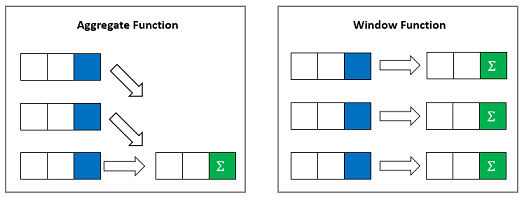

| **Normal Aggregate**                               | **Window Function**                                       |
| ---------------------------------------------- | ----------------------------------------------------- |
| **SELECT SUM**(salary) sum\_salary **FROM** employees;| **SELECT SUM**(salary) **OVER()** sum\_salary **FROM** employees; |
| **Output**                                         | **Output**                                                |
| **1 Row** with total sum of salary                 | **Many Rows** Grand total of all the salaries in a column for each row in the table            |




In [ ]:
-- Window Function
-- Setup Memory Tables
CREATE TABLE #Duplicates(Col1 INT, Col2 CHAR(1));
INSERT INTO #Duplicates(Col1, Col2) 
VALUES(1,'A'),(2,'B'),(2,'B'),(2,'B'),
	(3,'C'),(4,'D'),(4,'D'),(5,'E'),
	(5,'E'),(5,'E');
CREATE TABLE #MonthlyTempsStl(MName varchar(15), AvgHighTempF INT, 
     AvgHighTempC INT)
INSERT INTO #MonthlyTempsStl(MName, AvgHighTempF, AvgHighTempC)
VALUES('Jan',40,4),('Feb',45, 7),('Mar',56, 13),('Apr',67, 20),
	  ('May',76,25),('Jun',85,30),('Jul',89,32),('Aug',88,31),
	  ('Sep',80,27),('Oct',69,20),('Nov',56,13),('Dec',43,6);
-- End Setup of memory tables 

--Adding ROW_NUMBER and partitioning by each column will restart the row numbers for each unique set of rows. 
SELECT Col1, Col2, 
   ROW_NUMBER() OVER(PARTITION BY Col1, Col2 ORDER BY Col1) AS RowNum
FROM #Duplicates;

--Deleting Duplicates when records don't contain a key row identifier
WITH Dupes AS (
   SELECT Col1, Col2, 
     ROW_NUMBER() OVER(PARTITION BY Col1, Col2 ORDER BY Col1) AS RowNum
   FROM #Duplicates)
DELETE Dupes 
WHERE RowNum <> 1;
SELECT * FROM #Duplicates; -- See no more duplicates

-- Here is an example using the average high temperature in St. Louis for each month. Note that the ranks were determined by the Fahrenheit temperature.
SELECT MName, AvgHighTempF,AvgHighTempC, 
   RANK() OVER(ORDER BY AvgHighTempF) AS Rank,
   PERCENT_RANK() OVER(ORDER BY AvgHighTempF)  AS PercentRank,
   CUME_DIST() OVER(ORDER BY AvgHighTempF)  AS CumeDist
FROM #MonthlyTempsStl;

SELECT MName, AvgHighTempF,AvgHighTempC,
   RANK() OVER(ORDER BY AvgHighTempF) AS Rank,
   PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY AvgHighTempF) 
      OVER() AS PercentileCont,
   PERCENTILE_DISC(0.5) WITHIN GROUP(ORDER BY AvgHighTempF) 
      OVER() AS PercentileDisc
FROM #MonthlyTempsStl;

DROP Table #Duplicates;
DROP Table #MonthlyTempsStl;